# ***LETS START EXPLORING***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("Simple linear regression.csv")
data

In [ ]:
data.head()

In [ ]:
data.tail()

In [ ]:
data.dtypes

In [ ]:
data.nunique()

In [ ]:
data.describe()

In [ ]:
data.info()

In [9]:
x = data["SAT"]
y = data["GPA"]

In [ ]:
print(x)
print(y)

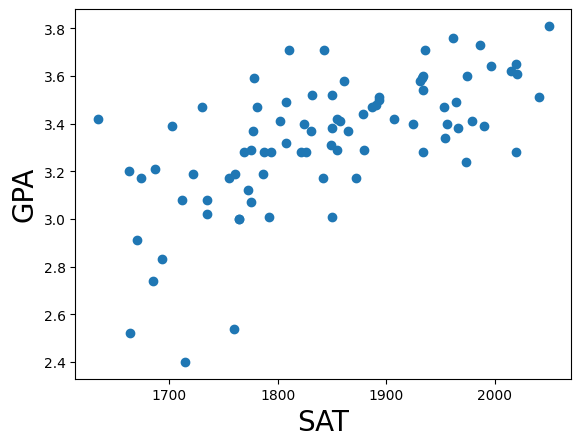

In [10]:
plt.scatter(x,y)
plt.xlabel("SAT", fontsize = 20)
plt.ylabel("GPA", fontsize = 20)
plt.show()

In [11]:
import statsmodels.api as sm

In [12]:
x1 = sm.add_constant(x)

In [13]:
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    GPA   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          2.120e+04
Date:                Wed, 06 Sep 2023   Prob (F-statistic):                   9.38e-102
Time:                        09:32:02   Log-Likelihood:                          12.440
No. Observations:                  84   AIC:                                     -22.88
Df Residuals:                      83   BIC:                                     -20.45
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SAT            0.0018   1.24e-05    145.594      0.000       0.002       0.002
==============================================================================
Omnibus:                        9.848   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.422
Skew:                          -0.594   Prob(JB):                      0.00331
Kurtosis:                       4.361   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

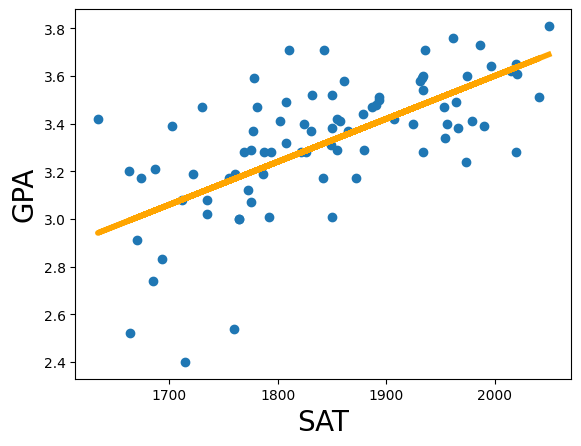

In [17]:
plt.scatter(x, y)
a = 0.0018*x + 0
fig = plt.plot(x, a, lw=4, c="orange", label = "regression line")
plt.xlabel("SAT", fontsize = 20)
plt.ylabel("GPA", fontsize = 20)
plt.show()

# ***LETS SKIP TO A NEW DATASET***

In [18]:
import seaborn as sns

In [19]:
df = pd.DataFrame(pd.read_csv("Advertising.csv"))
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
df.head(), df.tail(), df.dtypes, df.shape, df.nunique, df.describe, df.info()

In [20]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

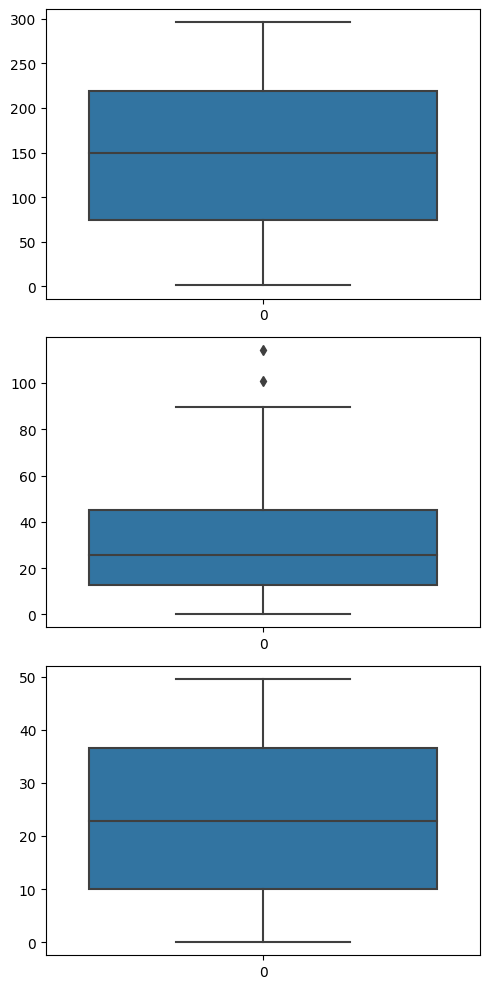

In [21]:
fig, axs = plt.subplots(3, figsize = (5, 10))
# plt1 = sns.boxplot(df['TV'], ax = axs[0], orient='h')
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

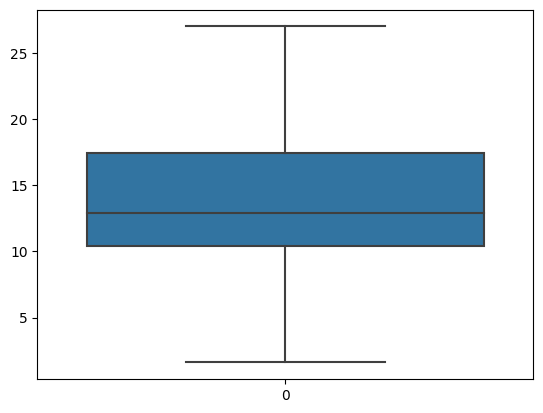

In [23]:
sns.boxplot(df['Sales'])
plt.show()

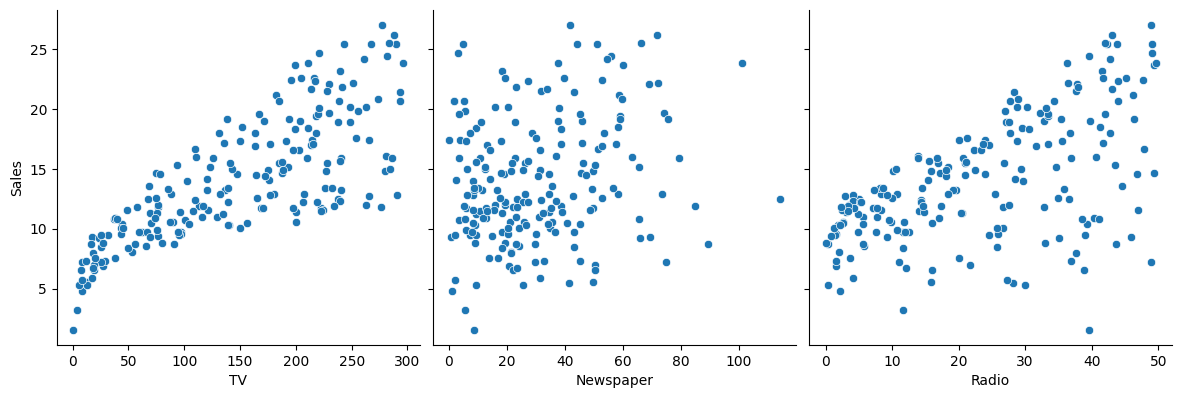

In [24]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

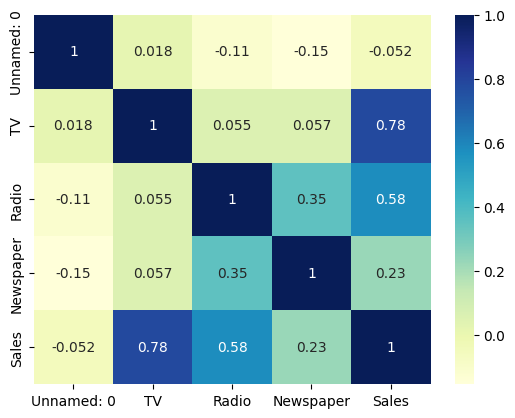

In [25]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [26]:
X = df['TV']
y = df['Sales']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [29]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [30]:
lr.params

const    7.113008
TV       0.046110
dtype: float64

In [31]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     257.5
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           5.36e-35
Time:                        09:49:51   Log-Likelihood:                -417.09
No. Observations:                 160   AIC:                             838.2
Df Residuals:                     158   BIC:                             844.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1130      0.492     14.469      0.000       6.142       8.084
TV             0.0461      0.003     16.048      0.000       0.040       0.052
==============================================================================
Omnibus:                        0.306   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.858   Jarque-Bera (JB):                0.467
Skew:                          -0.033   Prob(JB):                        0.792
Kurtosis:                       2.744   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

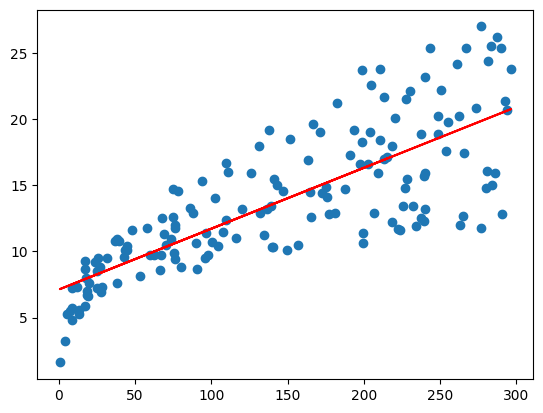

In [32]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 7.1130 + 0.046*X_train, 'r')
plt.show()

In [33]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [34]:
y_pred.head()

126     7.472664
104    18.096352
99     13.347047
92     17.151102
111    18.257736
dtype: float64

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.11240574923818

LOGISTIC

In [37]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
n = float(input("Enter no of values:"))
x1 = [float(k) for k in input("Enter %d values for x1:\n"%n).split(",")]
x2 = [float(k) for k in input("Enter %d values for x2:\n"%n).split(",")]
y = [float(k) for k in input("Enter %d values for y:\n"%n).split(",")]
print(x1,x2)
print(y)

Enter no of values:6


In [ ]:
x1 = np.array(x1)
x2 = np.array(x2)
y = np.array(y)

In [ ]:
b0 = b1 = b2 = 0
s = 0.3
p = []
pc = []
for i in range(int(n)):
    p.append( 1/(1+np.exp(-(b0+b1*x1[i]+b2*x2[i]))))
    b0 = b0+s*(y[i]-p[i])*p[i]*(1-p[i])*1
    b1 = b1+s*(y[i]-p[i])*p[i]*(1-p[i])*x1[i]
    b2 = b2+s*(y[i]-p[i])*p[i]*(1-p[i])*x2[i]
    if(p[i]>0.5):
        pc.append(1)
    else:
        pc.append(0)


In [ ]:
print('X1            X2            Actual Class      Prediction      Predicted Class')

In [ ]:
for i in range(int(n)):
    print("%f      %f       %d                  %f            %d"%(x1[i],x2[i],int(y[i]),p[i],pc[i]))
